In [1]:
import sys
sys.path.append('../')

from src.m4_generator import M4Generator
from src.m4_data_loader import M4DataLoader
from src.error_functions import smapetf
from src.visualization import *
from src.evaluation import evaluate_model
from src.m4_model import M4Model


import numpy as np
import keras
import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline

Using TensorFlow backend.


In [13]:
EPOCHS = 20
BATCH_SIZE = 50
LOOKBACK = 48
HORIZON = 48
HIDDEN_LAYER_SIZE = 500
LOSS = 'mae'

data_loader = M4DataLoader("../Dataset/Train/Hourly-train.csv", "../Dataset/Test/Hourly-test.csv",
                  LOOKBACK, HORIZON,  validation_ratio=0.05)

train_x, train_y = data_loader.get_training_data()
test_x, test_y = data_loader.get_test_data()
validate_x, validate_y = data_loader.get_validation_data()

training_data_generator = M4Generator(train_x, train_y, BATCH_SIZE)
test_data_generator = M4Generator(test_x, test_y, BATCH_SIZE)
validation_data_generator = M4Generator(validate_x, validate_y, BATCH_SIZE)

model = M4Model(hidden_layer_size=HIDDEN_LAYER_SIZE, batch_size=BATCH_SIZE, lookback=LOOKBACK, 
        horizon=HORIZON, learning_rate=0.001, loss = LOSS, dropout_ratio = 0.3)

model.train(training_data_generator, test_data_generator, epochs=EPOCHS)

hist = model.evaluate(validation_data_generator)
print(hist)
#model.save('../models')

Epoch 1/20
129/129 [==============================] - 70s 542ms/step - loss: 0.1298 - val_loss: 0.3931
Epoch 2/20
129/129 [==============================] - 68s 530ms/step - loss: 0.0745 - val_loss: 0.4069
Epoch 3/20
129/129 [==============================] - 67s 520ms/step - loss: 0.0669 - val_loss: 0.3270
Epoch 4/20
129/129 [==============================] - 64s 497ms/step - loss: 0.0619 - val_loss: 0.3545
Epoch 5/20
129/129 [==============================] - 65s 502ms/step - loss: 0.0595 - val_loss: 0.3339
Epoch 6/20
129/129 [==============================] - 66s 513ms/step - loss: 0.0570 - val_loss: 0.3962
Epoch 7/20
129/129 [==============================] - 64s 493ms/step - loss: 0.0556 - val_loss: 0.3901
Epoch 8/20
129/129 [==============================] - 66s 509ms/step - loss: 0.0545 - val_loss: 0.3249
Epoch 9/20
129/129 [==============================] - 68s 525ms/step - loss: 0.0535 - val_loss: 0.3650
Epoch 10/20
129/129 [==============================] - 68s 530ms/step - l

In [18]:

#=================== Evaluate Model
model = M4Model(batch_size=BATCH_SIZE)
model.load('../models/10/architecture.json','../models/10/weights.h5')

#model.compile()
#hist = model.train(gen, epochs=EPOCHS)

#gen = M4Generator("../Dataset/Train/Hourly-train.csv", "../Dataset/Test/Hourly-test.csv",
                  #48, 48, 100)

#train_x, train_y, test_x, test_y = gen.get_data()

train_error = evaluate_model(model, train_x, train_y, smapetf)
print(train_error)

test_error = evaluate_model(model, test_x, test_y, smapetf)
print(test_error)


Loaded model from disk
8.307667445133148
62.161848285975026


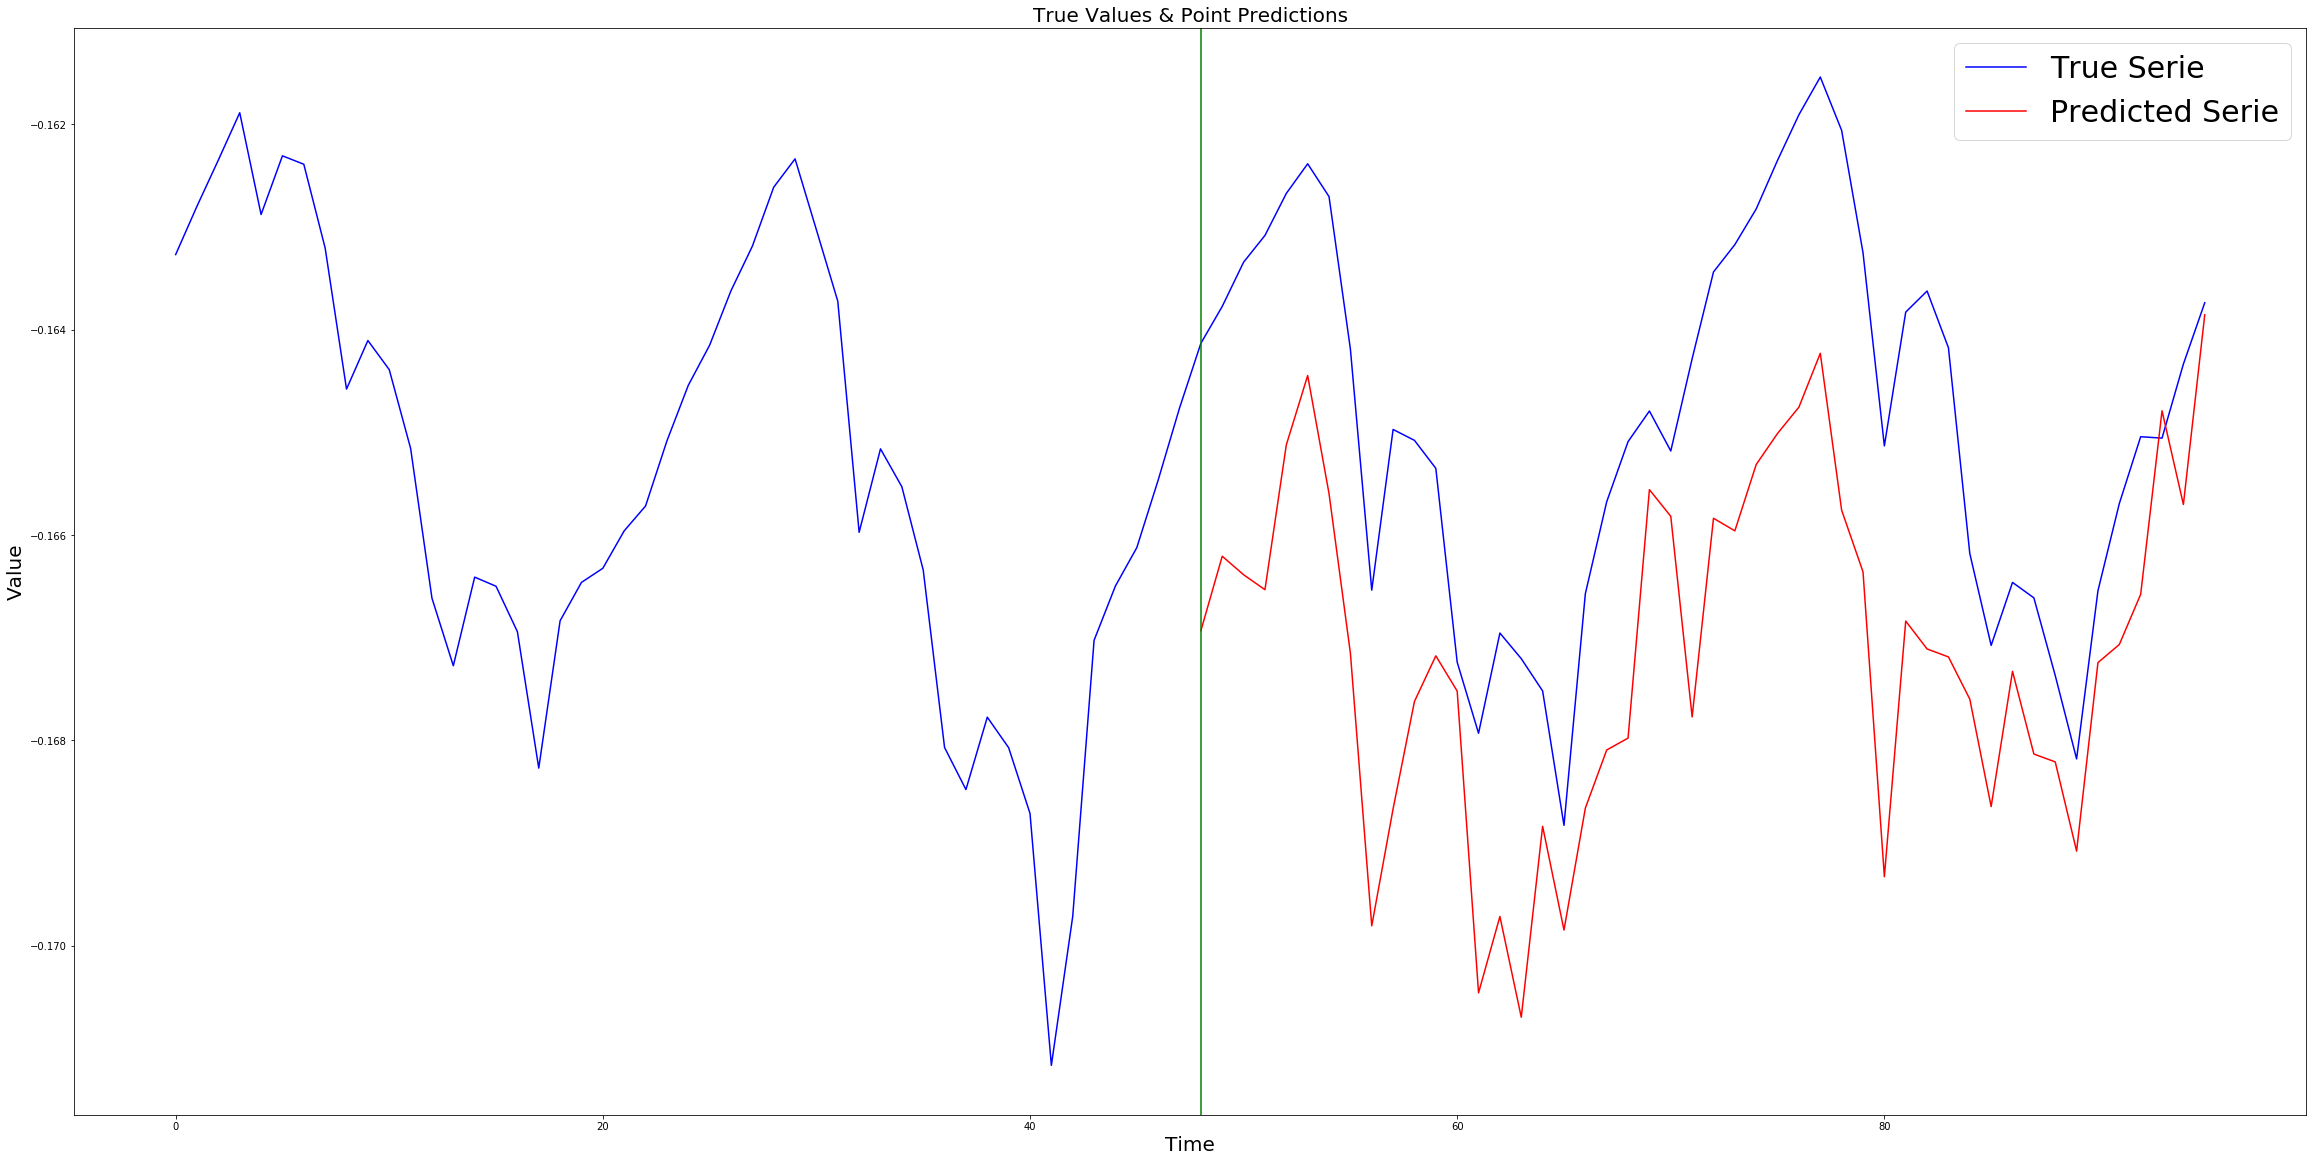

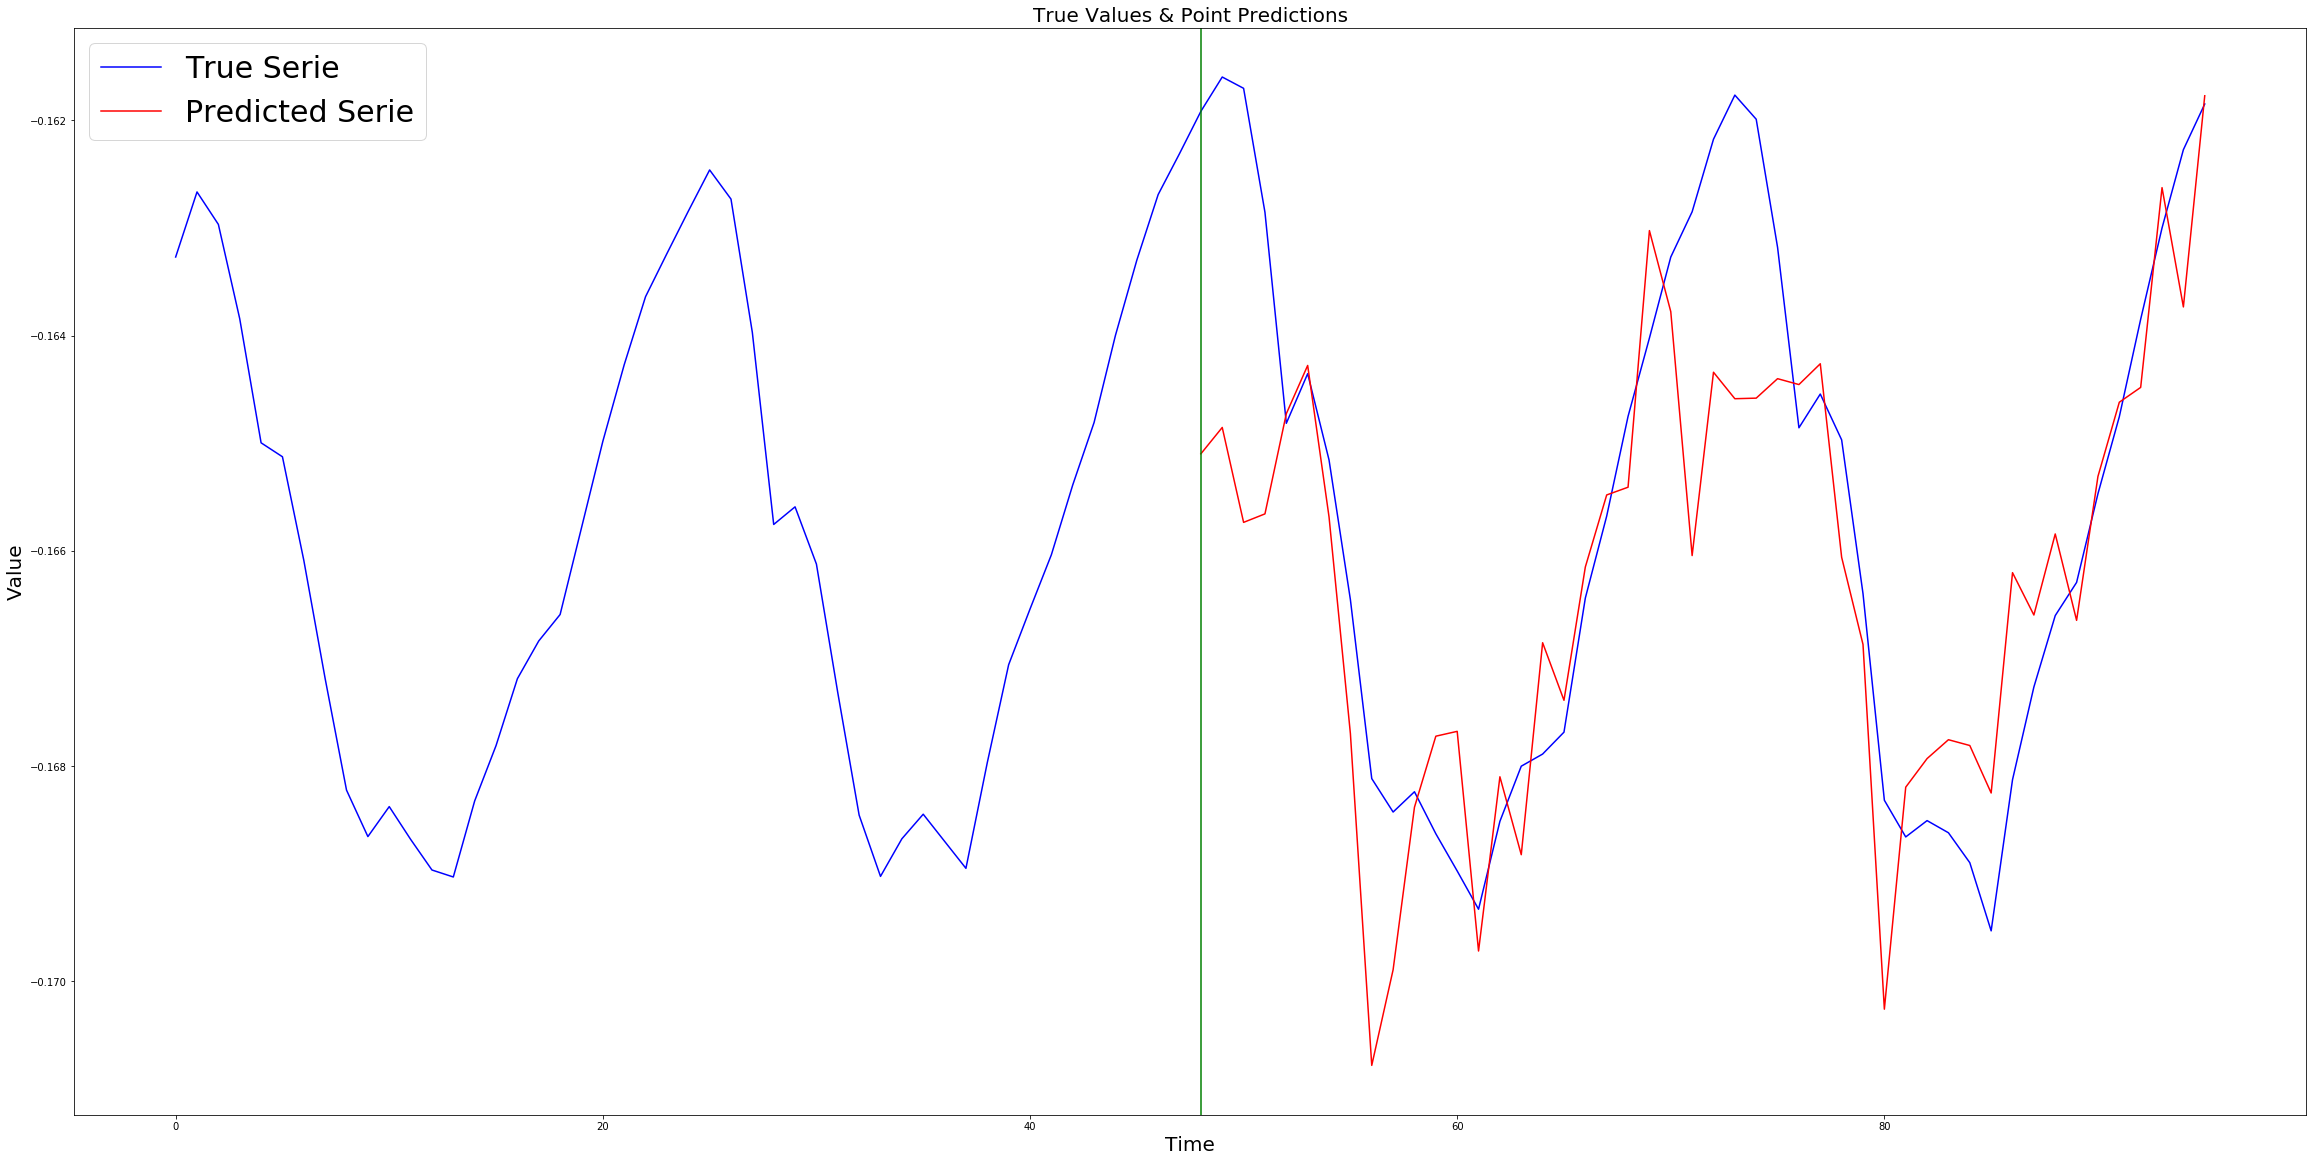

In [20]:
IDX = 9
#============ Predict Train
predictedY = model.predict(train_x[:BATCH_SIZE,:].reshape(BATCH_SIZE, LOOKBACK, 1))

#plot_series(train_x, train_y, predictedY, series_num=10)
plot_serie_and_prediction(train_x, train_y, predictedY, serie_indx=IDX)

#============ Predict Test
predictedY = model.predict(test_x[:BATCH_SIZE,:].reshape(BATCH_SIZE, LOOKBACK, 1))

#plot_series(test_x, test_y, predictedY, series_num=10)
plot_serie_and_prediction(test_x, test_y, predictedY, serie_indx=IDX)

In [31]:
from utils import exponential_smoothing

gen = M4Generator("../Dataset/Train/Hourly-train.csv", "../Dataset/Test/Hourly-test.csv",
                  640, HORIZON, BATCH_SIZE)
train_x, train_y, test_x, test_y = gen.get_data()

yPred =  np.empty(shape=[0, HORIZON])
for data in test_x:
    pred = exponential_smoothing(data)
    yPred = np.vstack((yPred, pred))

print(yPred.shape)

/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3

/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3/envs/pjawt/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/Users/d070867/miniconda3

(414, 48)


tf.Tensor(86.17036794357033, shape=(), dtype=float64)


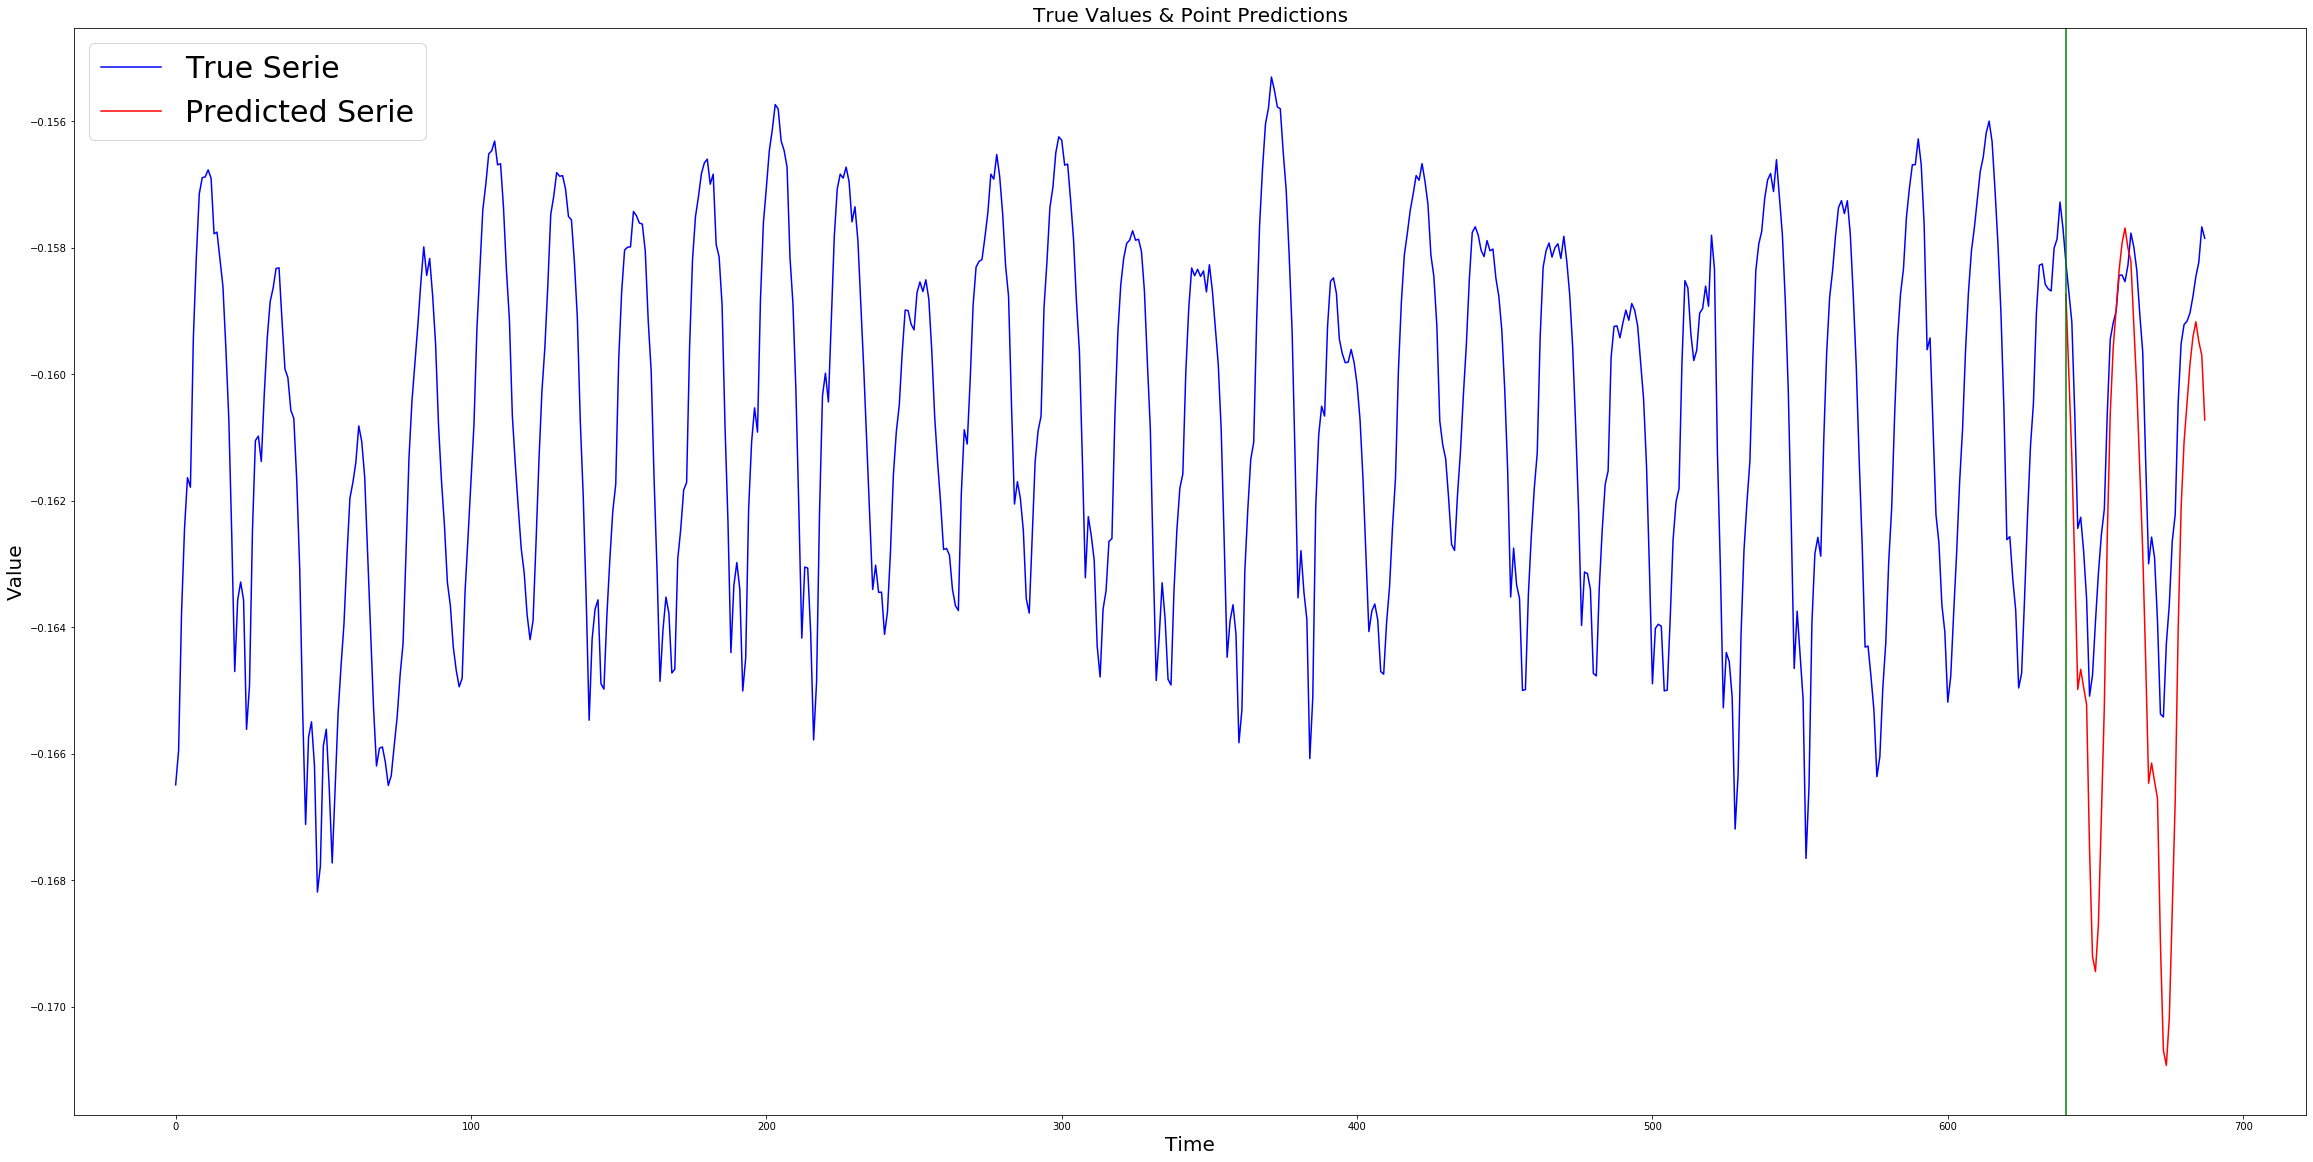

In [33]:
IDX = 0
print( smapetf(test_y, yPred))
plot_serie_and_prediction(test_x, test_y, yPred, serie_indx=IDX)